# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('./data/raw/SimulationResult.json')
df.head()

,step,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1,status
0,0,273.0,57.0,718.0,107.0,53.000,0,0,0.000000,0.000000,0.000000,0.000000,298.992329,403.15,2.3,0.000000,0.000000,0.000000,0.000000,OK
1,1,273.0,57.0,718.0,107.0,53.000,0,1,0.000000,2.743378,7.277625,0.000000,294.620543,403.15,2.3,12.028968,7.282596,0.000000,0.000000,OK
2,2,273.0,57.0,718.0,107.0,53.000,1,0,13.876143,0.000000,0.000000,3.107132,254.569586,403.15,2.3,0.000000,0.000000,7.711077,34.436903,OK
3,3,273.0,57.0,718.0,107.0,53.000,1,1,13.876143,2.743378,7.277625,3.107132,254.569586,403.15,2.3,12.028968,7.282596,7.711077,34.436903,OK
4,4,273.0,57.0,718.0,107.0,61.375,0,0,0.000000,0.000000,0.000000,0.000000,288.558739,403.15,2.3,0.000000,0.000000,0.000000,0.000000,OK


In [4]:
features = ['vazaoVapor', 'pressaoVapor', 'temperaturaVapor',
            'cargaVaporTG1', 'cargaVaporTG2', 'habilitaTG1', 'habilitaTG2']

In [5]:
targets = ['consumoEspecificoTG1_1', 'consumoEspecificoTG1_2',
           'consumoEspecificoTG2_1', 'consumoEspecificoTG2_2',
           'potenciaGeradaTG1_1', 'potenciaGeradaTG1_2',
           'potenciaGeradaTG2_1', 'potenciaGeradaTG2_2',
           'vazaoVaporEscape', 'pressaoVaporEscape', 'temperaturaVaporEscape']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72900 entries, 0 to 72899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   step                    72900 non-null  int64  
 1   vazaoVapor              72900 non-null  float64
 2   pressaoVapor            72900 non-null  float64
 3   temperaturaVapor        72900 non-null  float64
 4   cargaVaporTG1           72900 non-null  float64
 5   cargaVaporTG2           72900 non-null  float64
 6   habilitaTG1             72900 non-null  int64  
 7   habilitaTG2             72900 non-null  int64  
 8   potenciaGeradaTG1_2     72871 non-null  float64
 9   potenciaGeradaTG2_2     72871 non-null  float64
 10  potenciaGeradaTG2_1     72871 non-null  float64
 11  potenciaGeradaTG1_1     72871 non-null  float64
 12  vazaoVaporEscape        72871 non-null  float64
 13  temperaturaVaporEscape  72871 non-null  float64
 14  pressaoVaporEscape      72871 non-null

In [52]:
df.isna().sum()

step                       0
vazaoVapor                 0
pressaoVapor               0
temperaturaVapor           0
cargaVaporTG1              0
cargaVaporTG2              0
habilitaTG1                0
habilitaTG2                0
potenciaGeradaTG1_2       29
potenciaGeradaTG2_2       29
potenciaGeradaTG2_1       29
potenciaGeradaTG1_1       29
vazaoVaporEscape          29
temperaturaVaporEscape    29
pressaoVaporEscape        29
consumoEspecificoTG2_2     0
consumoEspecificoTG2_1     0
consumoEspecificoTG1_2     0
consumoEspecificoTG1_1     0
status                     0
dtype: int64

In [7]:
df['status'].value_counts()

status
OK                    72871
Falha na simulação       29
Name: count, dtype: int64

In [8]:
df.query('status == "Falha na simulação"').head()

,step,vazaoVapor,pressaoVapor,temperaturaVapor,cargaVaporTG1,cargaVaporTG2,habilitaTG1,habilitaTG2,potenciaGeradaTG1_2,potenciaGeradaTG2_2,potenciaGeradaTG2_1,potenciaGeradaTG1_1,vazaoVaporEscape,temperaturaVaporEscape,pressaoVaporEscape,consumoEspecificoTG2_2,consumoEspecificoTG2_1,consumoEspecificoTG1_2,consumoEspecificoTG1_1,status
752,752,273.000,57.0,797.5,148.0,120.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
3266,3266,273.000,60.0,718.0,107.0,103.250,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
5142,5142,273.000,61.5,718.0,250.5,111.625,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
15231,15231,290.875,63.0,797.5,107.0,53.000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação
17092,17092,308.750,57.0,797.5,230.0,111.625,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Falha na simulação


In [9]:
df.step.is_unique

True

We decided to drop the lines with Fail Simulation Status (`status` == "Falha na simulação")

In [14]:
data = df.query('status == "OK"').copy().drop(columns=['status'])

In [54]:
# Check which columns have constant values
print('Columns with constant values:', data.columns[data.nunique() == 1].tolist())

Columns with constant values: ['temperaturaVaporEscape', 'pressaoVaporEscape']


## Plotting Histograms to Understand the Data

array([[<Axes: title={'center': 'vazaoVapor'}>,
        <Axes: title={'center': 'pressaoVapor'}>,
        <Axes: title={'center': 'temperaturaVapor'}>],
       [<Axes: title={'center': 'cargaVaporTG1'}>,
        <Axes: title={'center': 'cargaVaporTG2'}>,
        <Axes: title={'center': 'habilitaTG1'}>],
       [<Axes: title={'center': 'habilitaTG2'}>, <Axes: >, <Axes: >]],
      dtype=object)

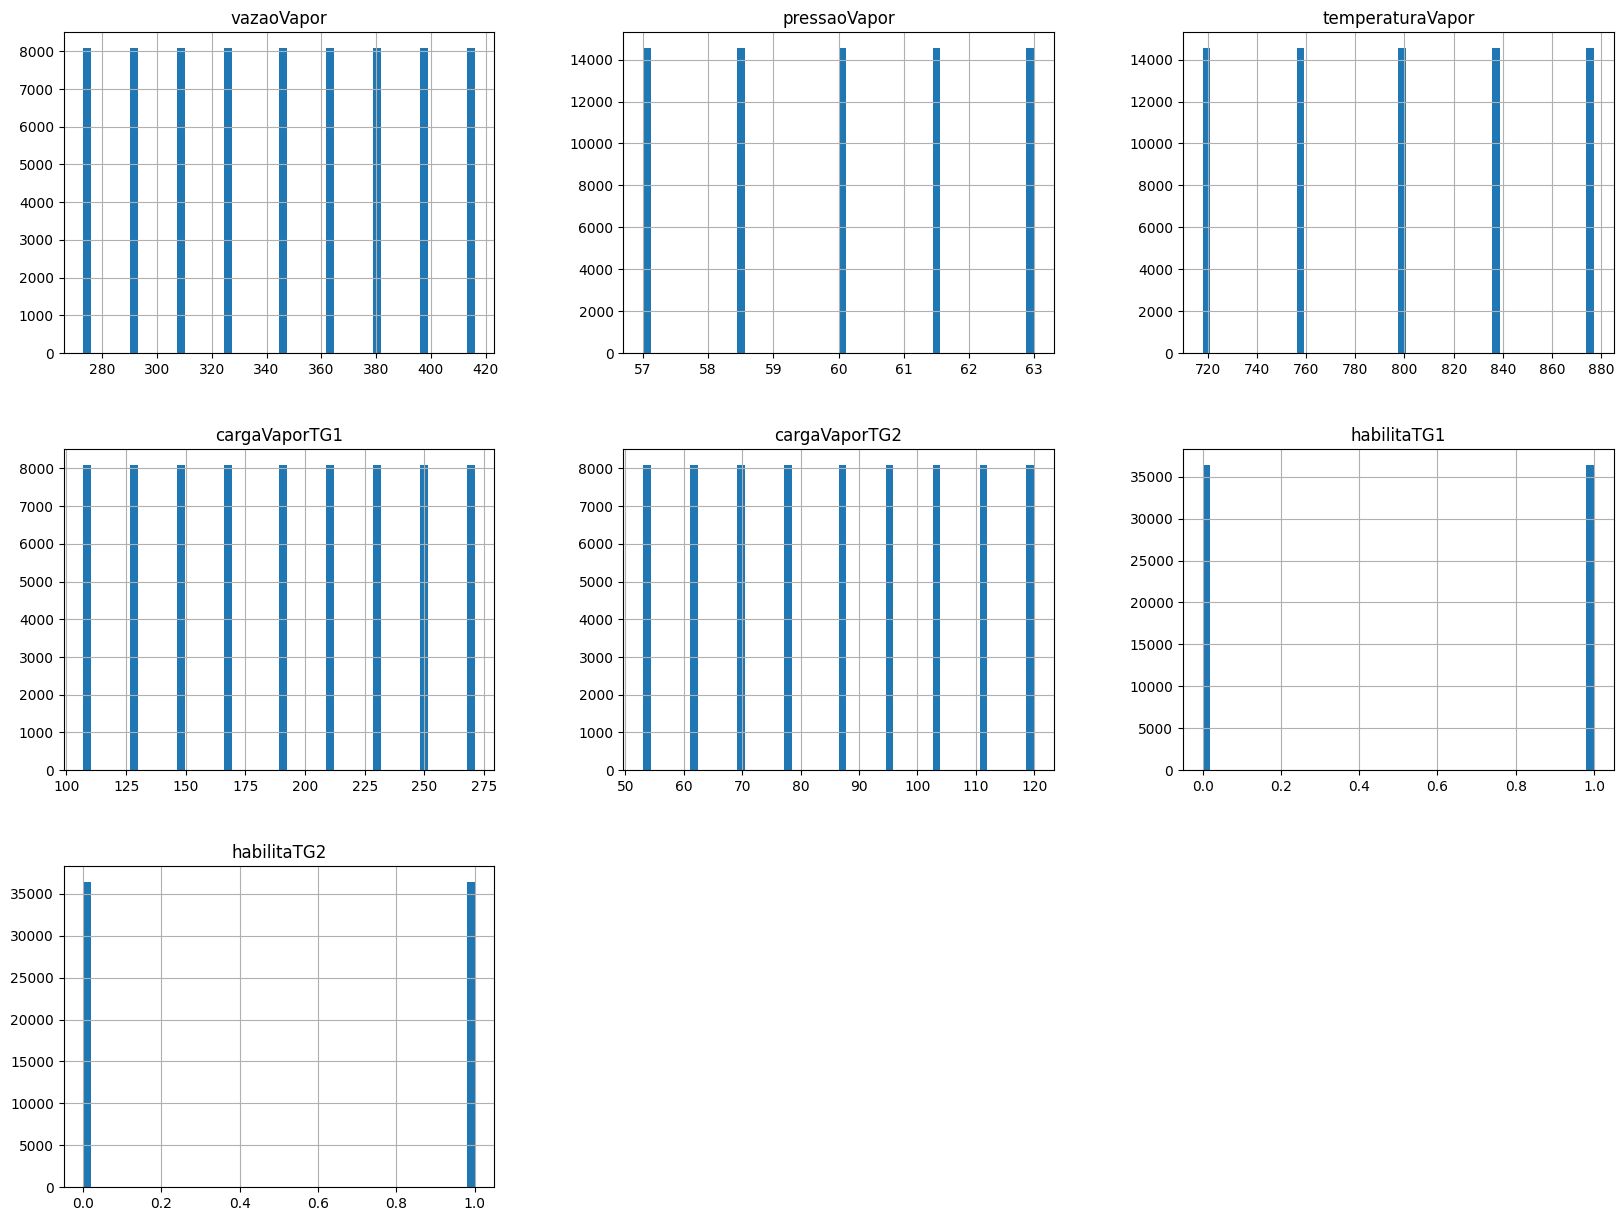

In [15]:
# Plot histogram for each of the features
data[features].hist(bins=50, figsize=(20, 15))

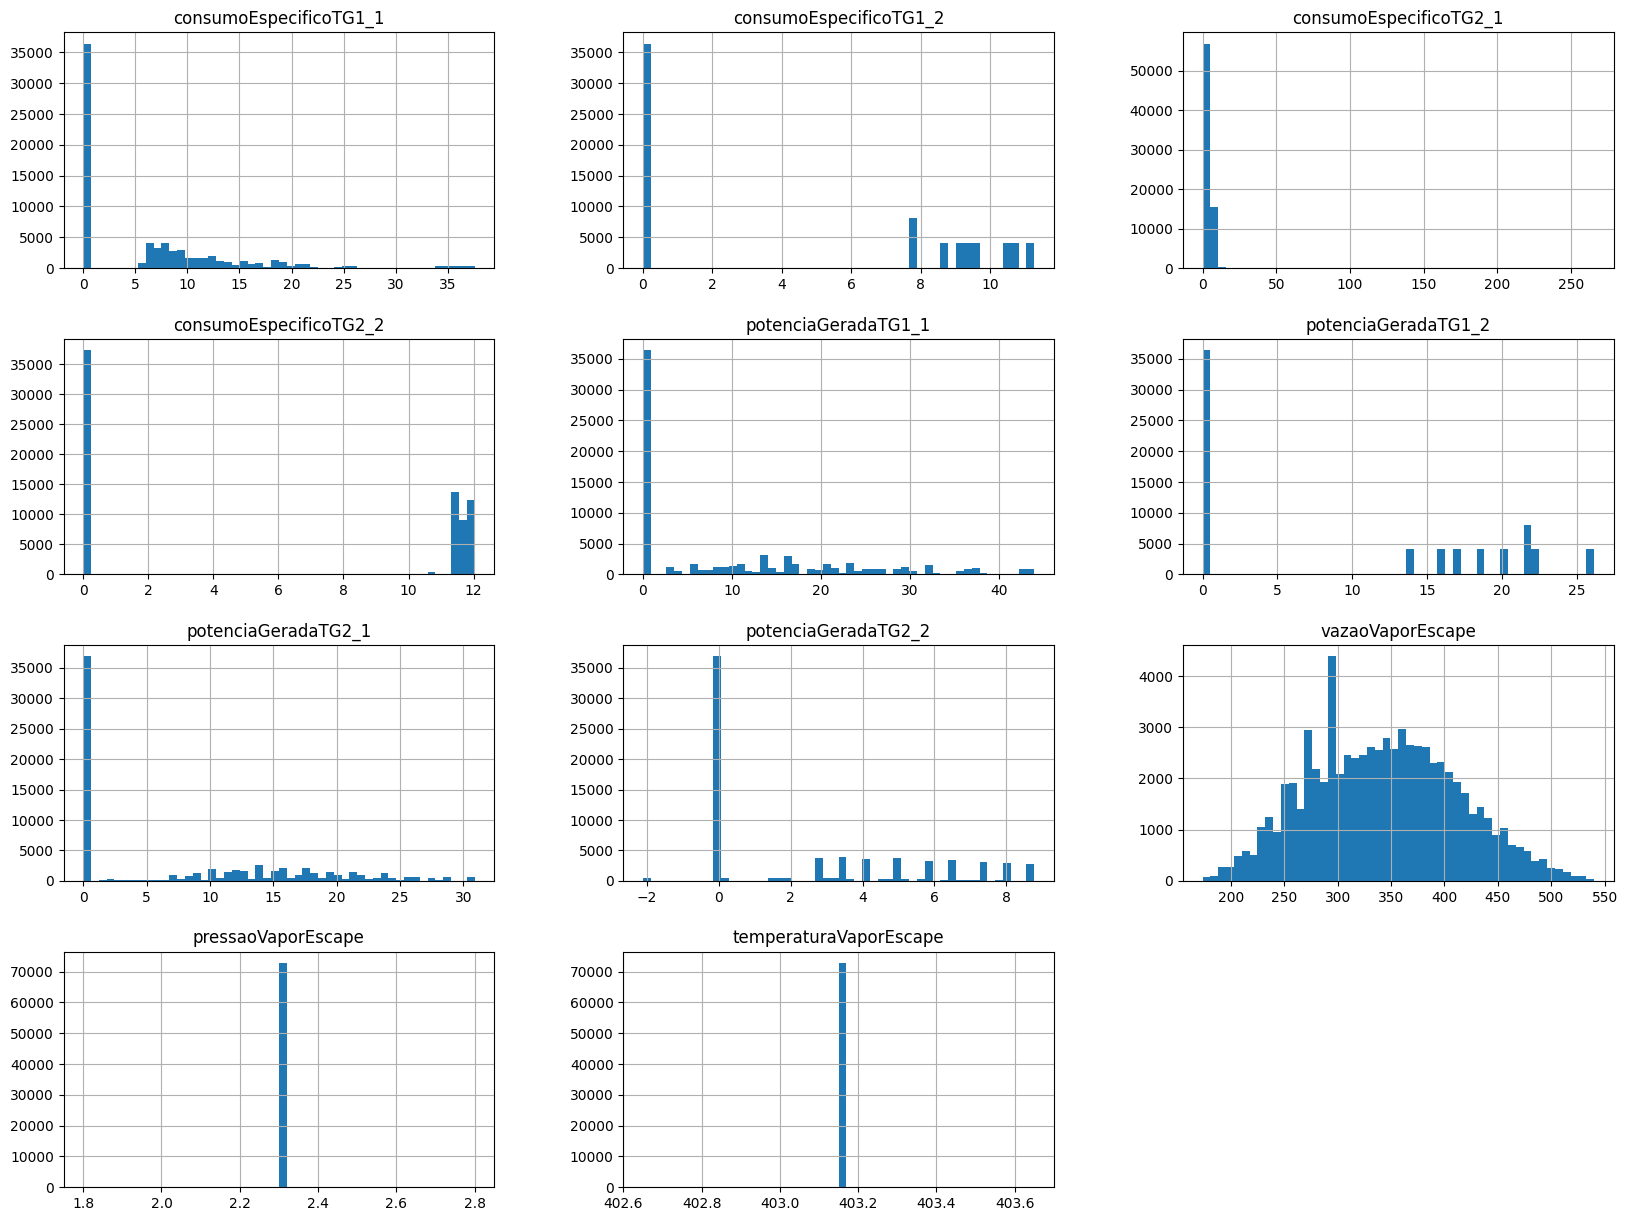

In [16]:
# Plot histogram for each of the targets
data[targets].hist(bins=50, figsize=(20, 15));

<Axes: >

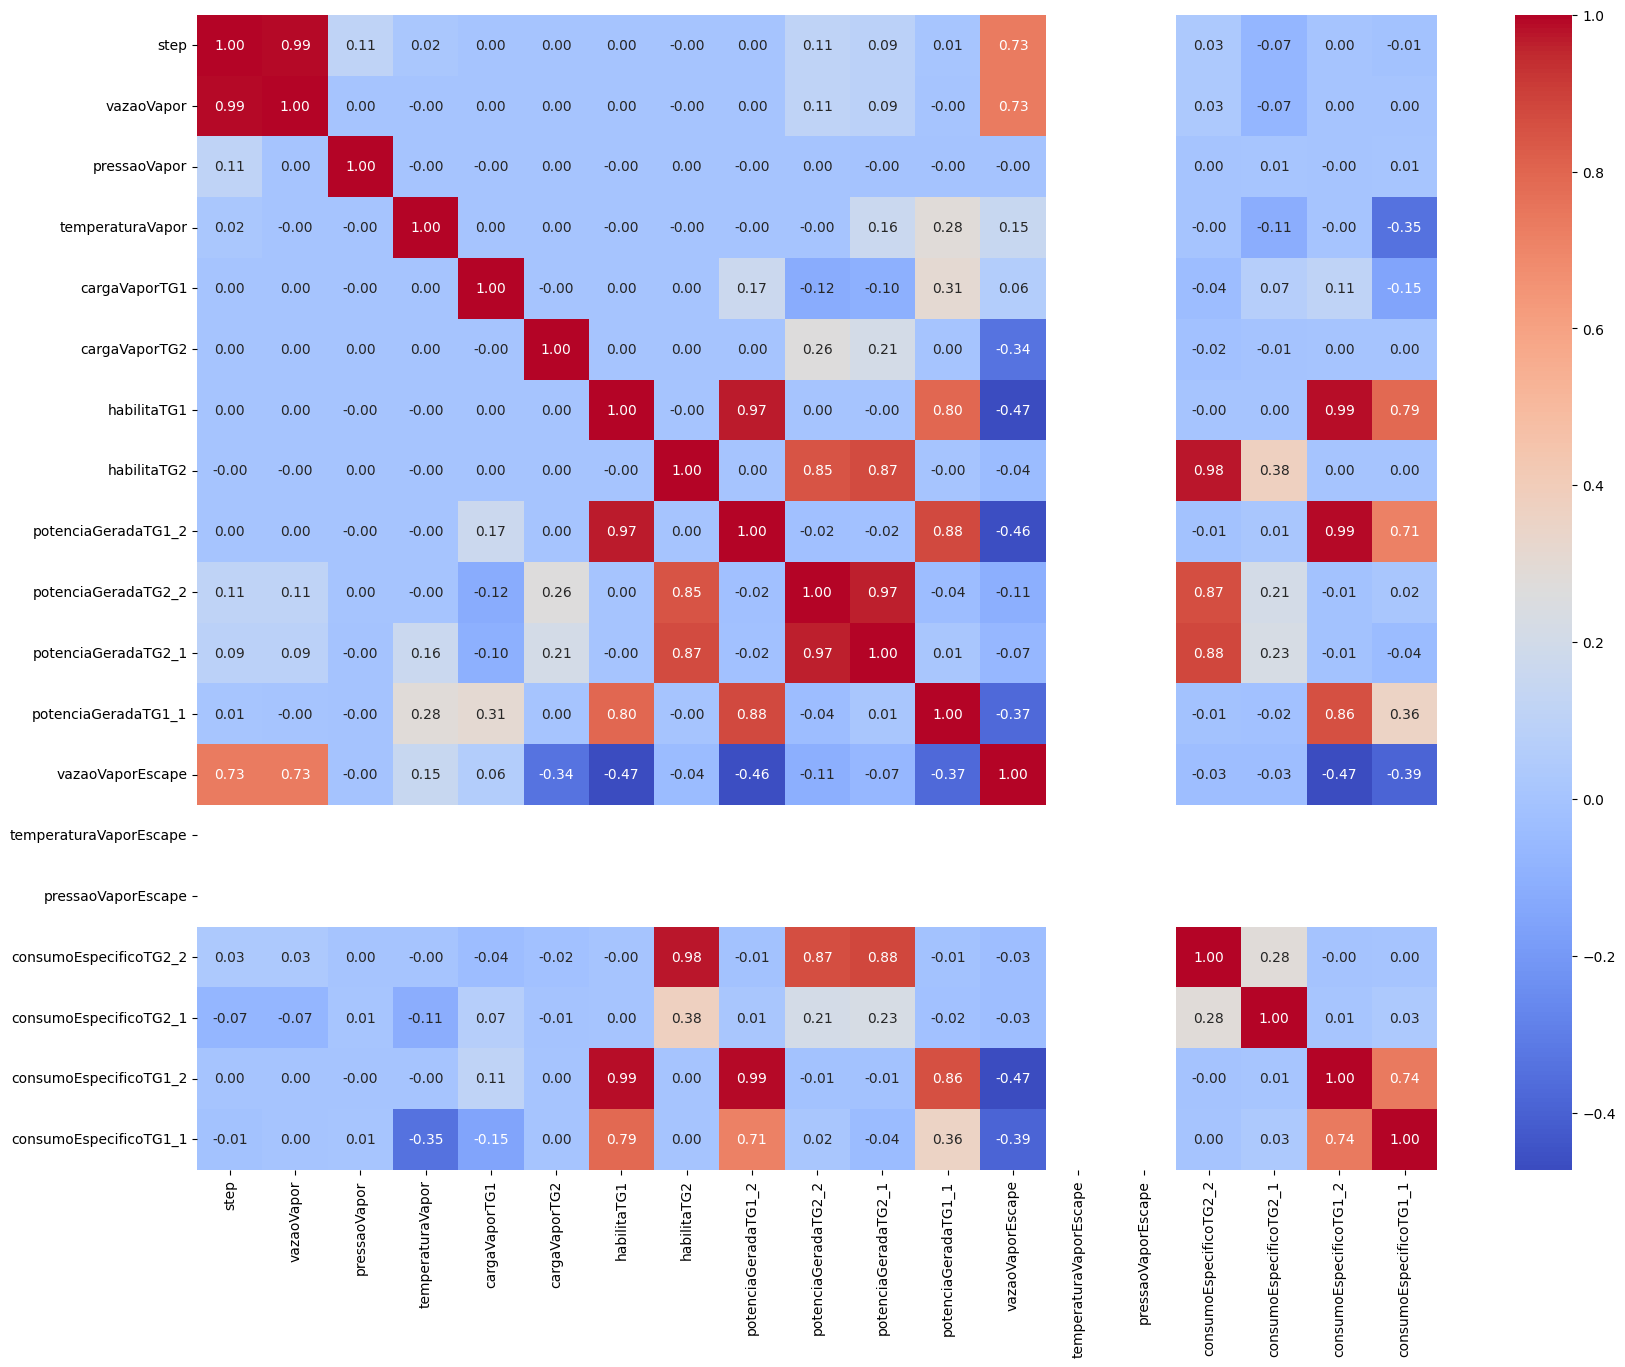

In [17]:
# Plot correlation matrix
corr = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [75]:
corr_features_targets = corr.loc[features, targets]
corr_columns_order = corr_features_targets.abs().sum(axis=1).sort_values(ascending=False).index.to_list()

# Sort the correlation matrix by the sum of the absolute values of the correlations
corr_features_targets = corr_features_targets.loc[corr_columns_order]

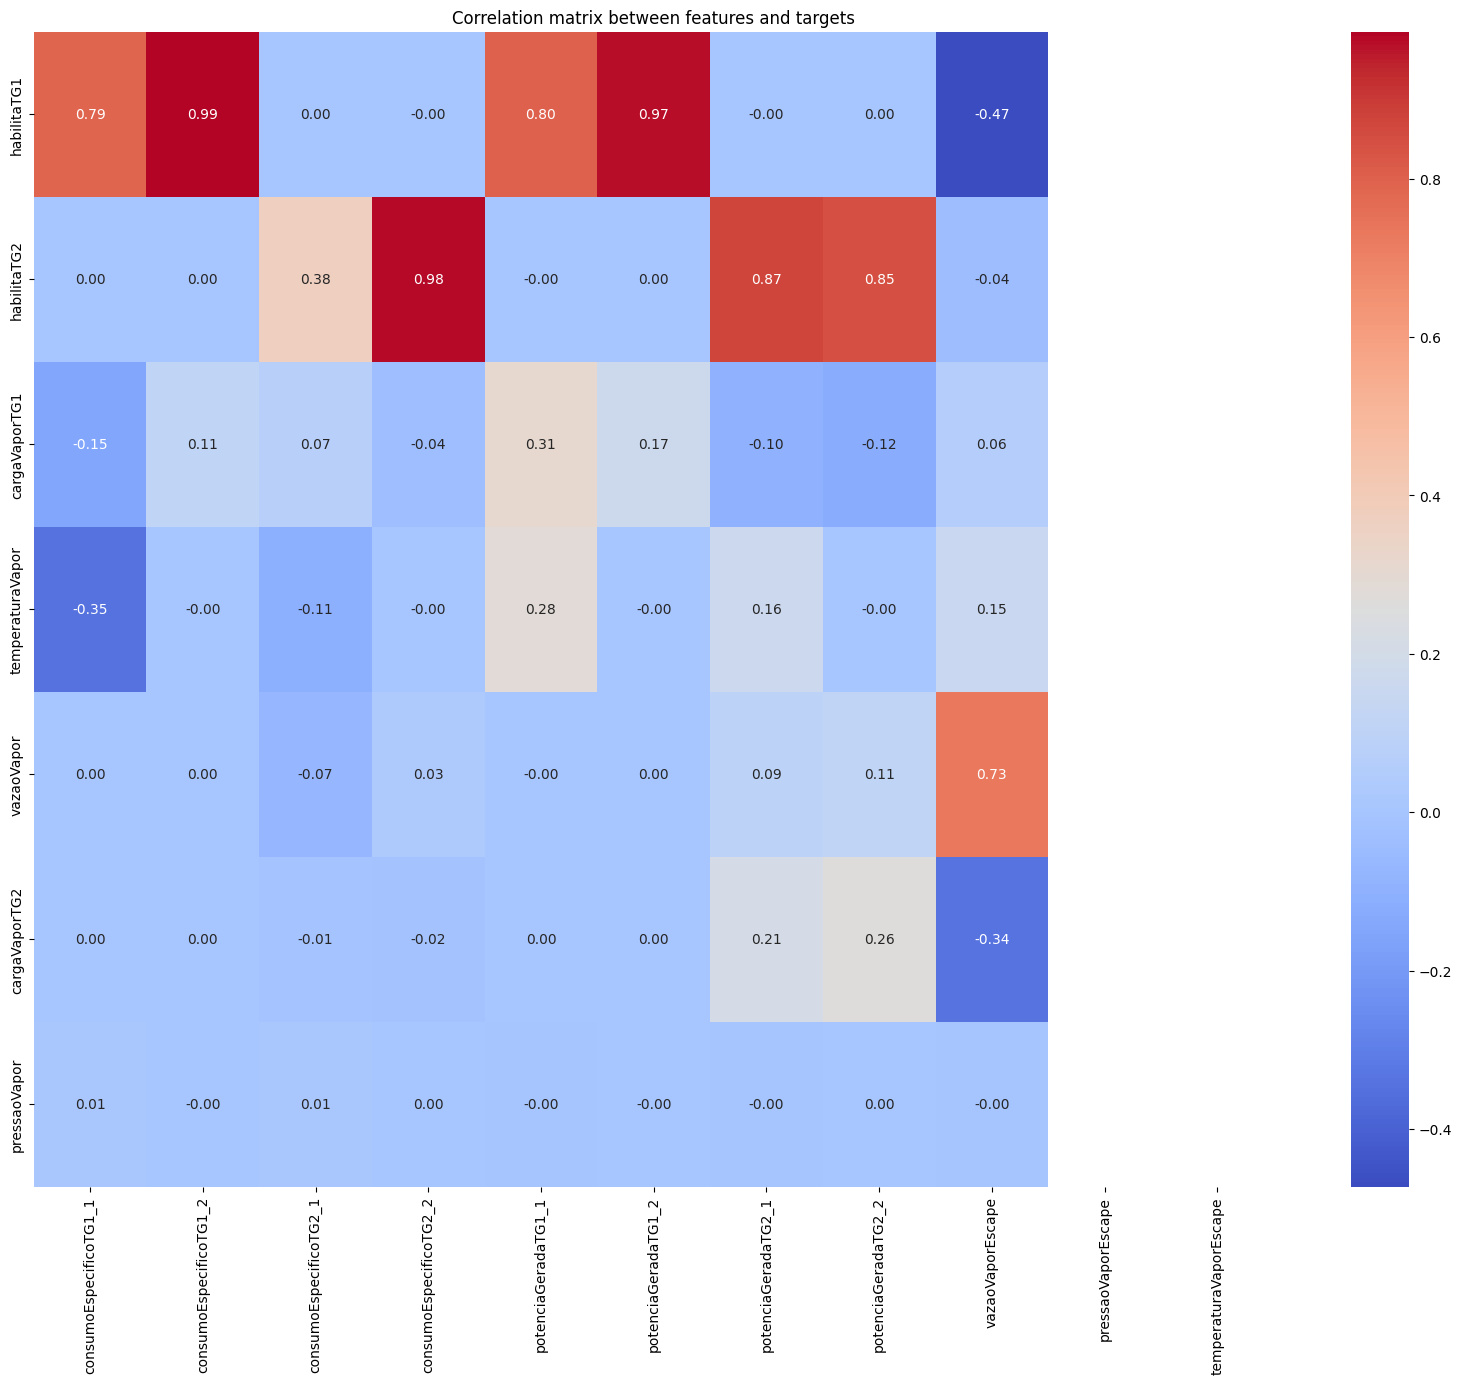

In [81]:
# Create a heatmap with the features in the vertical axis and the targets in the horizontal axis
plt.figure(figsize=(20, 15))
sns.heatmap(corr_features_targets, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix between features and targets');

In [78]:
data['habilitaTG1'].value_counts()

habilitaTG1
0    36441
1    36430
Name: count, dtype: int64

In [79]:
data['consumoEspecificoTG1_2'].value_counts()

consumoEspecificoTG1_2
0.000000     36441
10.369274     4050
7.876637      4048
8.652096      4048
9.687226      4048
10.642301     4048
11.266021     4048
9.198821      4047
9.361347      4047
7.711077      4046
Name: count, dtype: int64

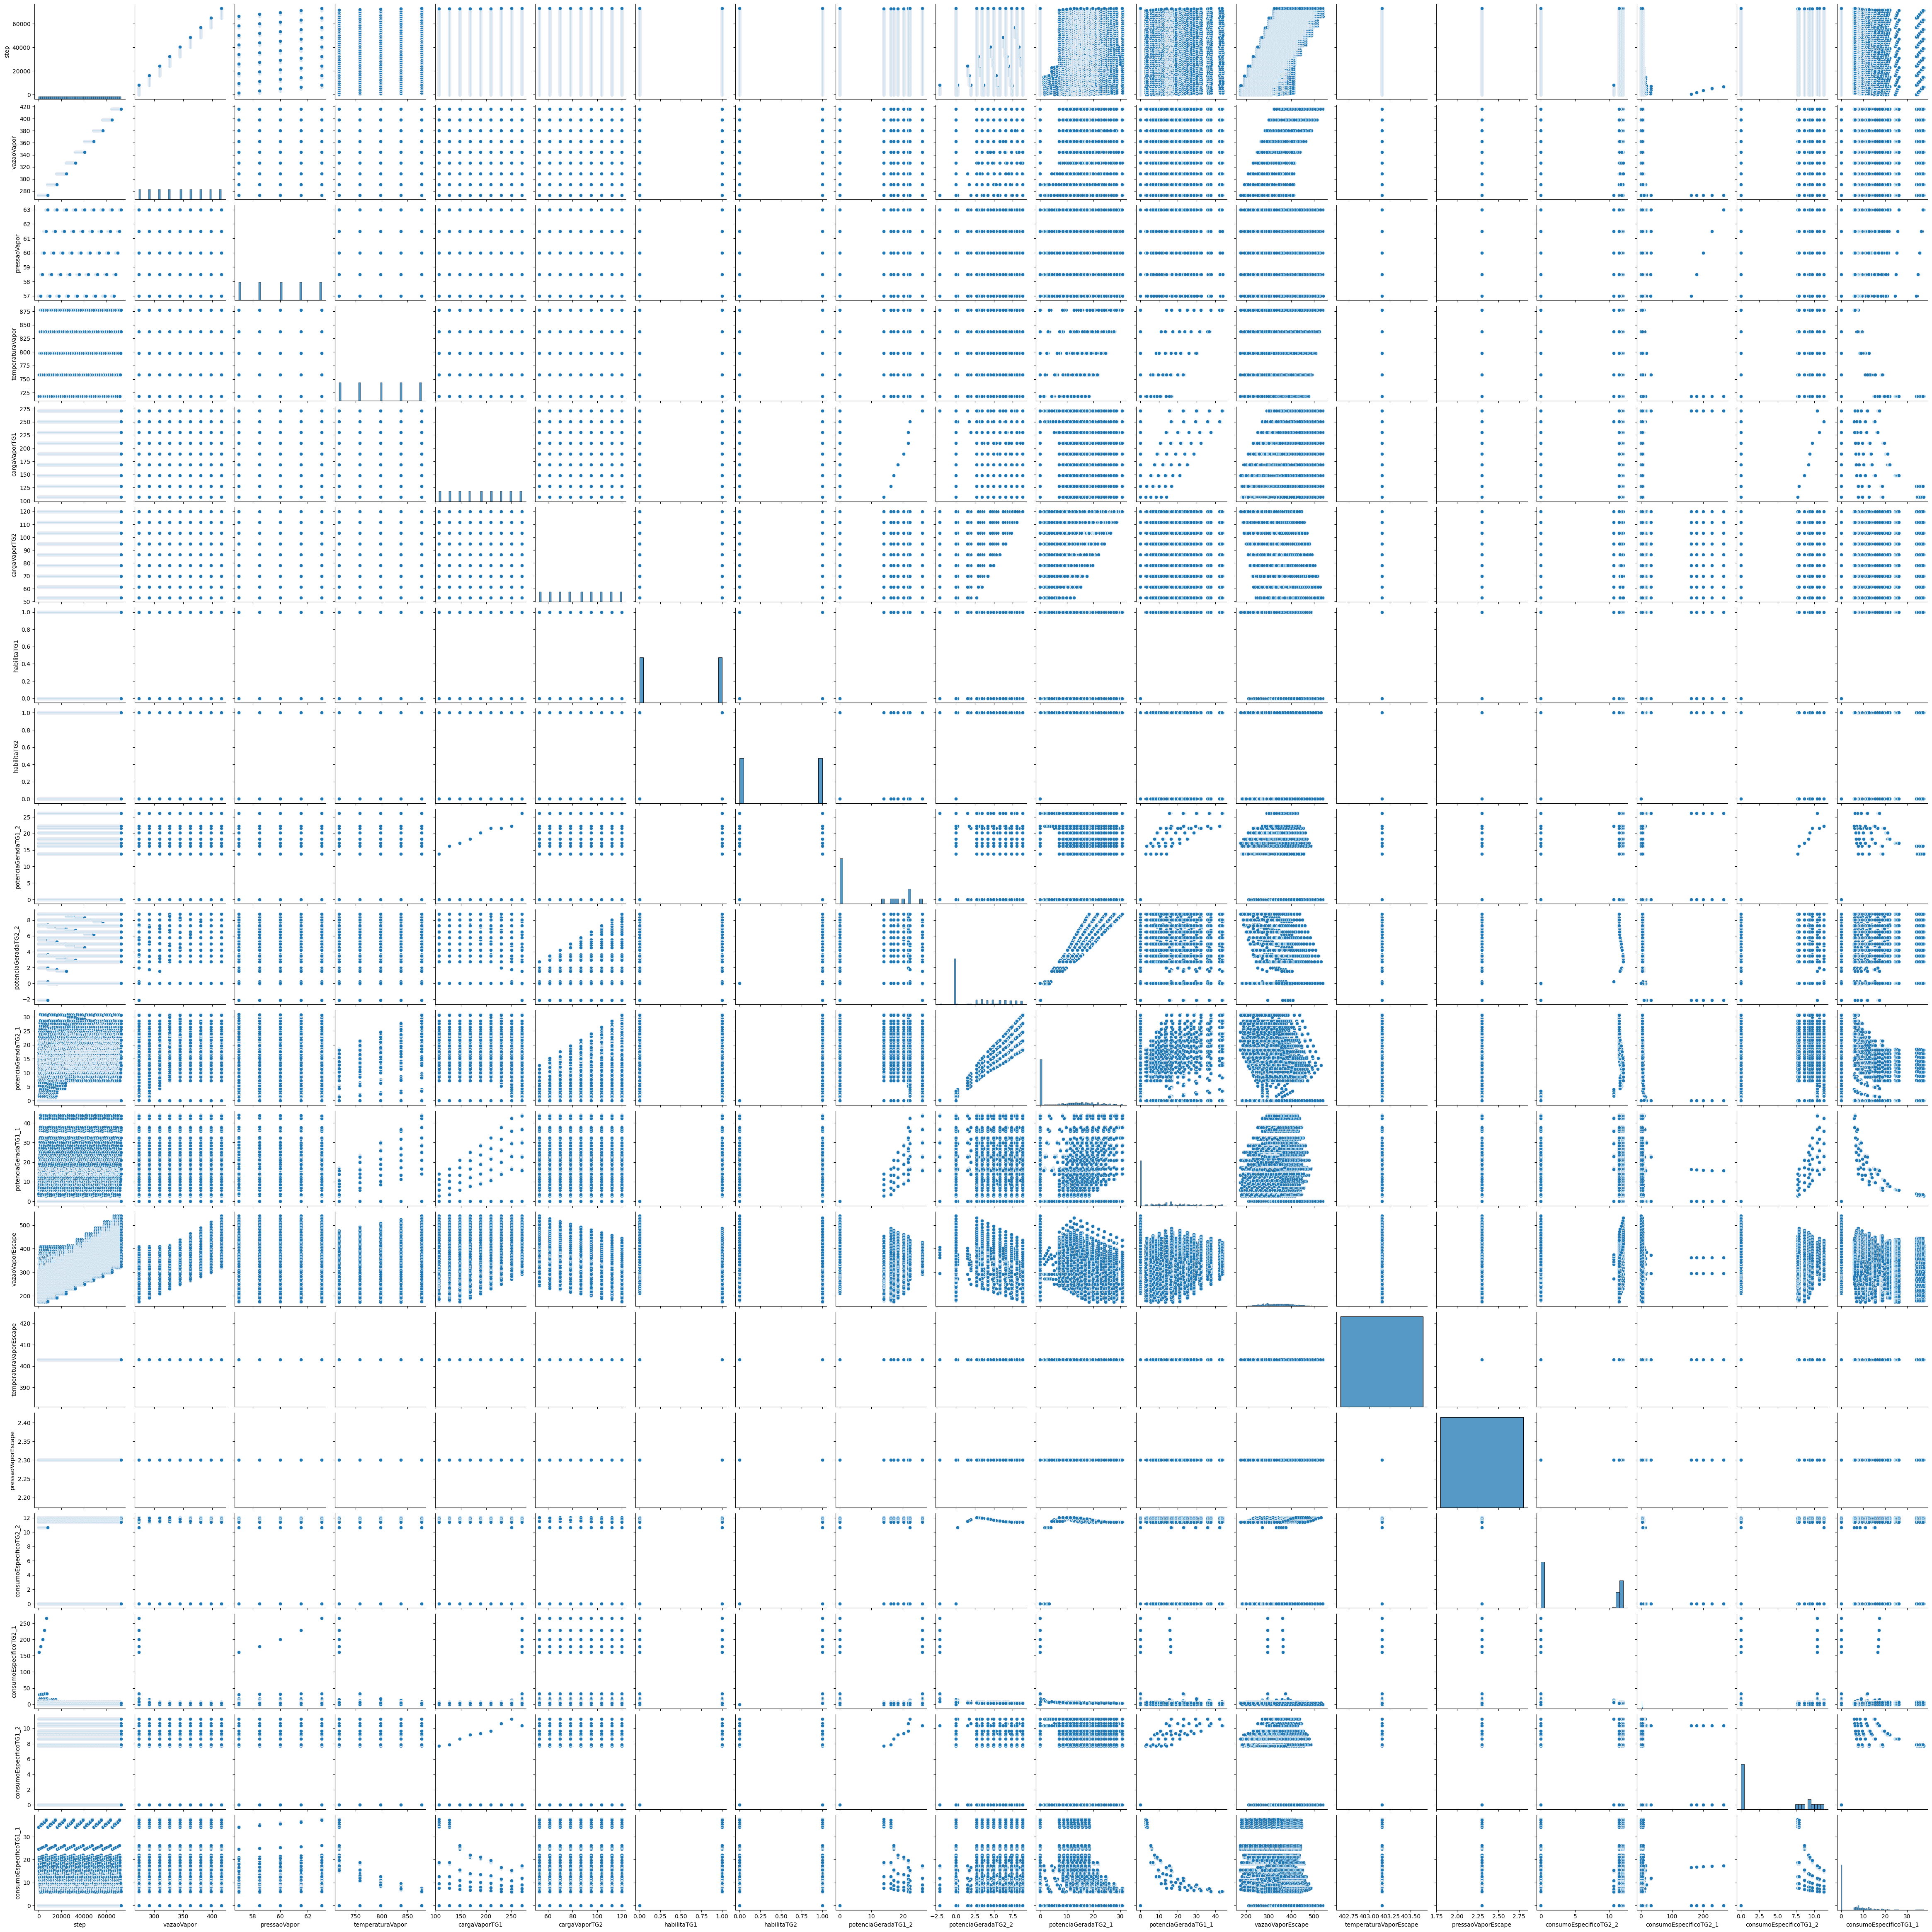

In [18]:
# Plot pairplot
# Too slow (2min to plot in my laptop) and did not bring much insights
# sns.pairplot(data)


In [ ]:
# Plot scatter plot for each of the features against each of the targets
# for feature in features:
#     for target in targets:
#         plt.figure()
#         sns.scatterplot(x=feature, y=target, data=data)
# # Plot scatter plot for each of the targets against each of the targets
# for target1 in targets:
#     for target2 in targets:
#         plt.figure()
#         sns.scatterplot(x=target1, y=target2, data=data)

# # Plot boxplot for each of the features against each of the targets
# for feature in features:
#     for target in targets:
#         plt.figure()
#         sns.boxplot(x=feature, y=target, data=data)

# # Plot boxplot for each of the targets against each of the targets
# for target1 in targets:
#     for target2 in targets:
#         plt.figure()
#         sns.boxplot(x=target1, y=target2, data=data)

# # Plot violin plot for each of the features against each of the targets
# for feature in features:
#     for target in targets:
#         plt.figure()
#         sns.violinplot(x=feature, y=target, data=data)

# # Plot violin plot for each of the targets against each of the targets
# for target1 in targets:
#     for target2 in targets:
#         plt.figure()
#         sns.violinplot(x=target1, y=target2, data=data)

# # Plot swarm plot for each of the features against each of the targets
# for feature in features:
#     for target in targets:
#         plt.figure()
#         sns.swarmplot(x=feature, y=target, data=data)

# # Plot swarm plot for each of the targets against each of the targets
# for target1 in targets:
#     for target2 in targets:
#         plt.figure()
#         sns.swarmplot(x=target1, y=target2, data=data)

# # Plot scatter plot for each of the features against each of the targets
# for feature in features:
#     for target in targets:
#         plt.figure()
#         sns.scatterplot(x=feature, y=target, data=data, hue='status')

# # Plot scatter plot for each of the targets against each of the targets
# for target1 in targets:
#     for target2 in targets:
#         plt.figure()
#         sns.scatterplot(x=target1, y=target2, data=data, hue='status')

        